# C-More

### 1. Process text to extract keywords

In [1]:
import json
import pandas as pd

import nltk
from nltk.tokenize import TweetTokenizer
import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

#### 1.1. Load json data into a dataframe

In [2]:
list_json = []

with open('tweet_json_1day.txt') as file:
    for line in file:
        data = json.loads(line)
        list_json.append(data)

df = pd.DataFrame(list_json, columns = ['id', 'text', 'lang', 'created_at', 'public_metrics'])

In [3]:
df['retweets'] = df['public_metrics'].map(lambda x: x['retweet_count'])
df['replies'] = df['public_metrics'].map(lambda x: x['reply_count'])
df['likes'] = df['public_metrics'].map(lambda x: x['like_count'])
df['quotes'] = df['public_metrics'].map(lambda x: x['quote_count'])

In [4]:
df.drop('public_metrics', axis=1, inplace=True)

In [5]:
df.head()

,id,text,lang,created_at,retweets,replies,likes,quotes
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21T23:59:52.000Z,0,0,3,0
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21T23:59:36.000Z,0,1,4,0
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21T23:59:33.000Z,0,2,4,0
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst,2022-06-21T23:59:32.000Z,0,0,1,0
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21T23:59:16.000Z,0,1,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153 entries, 0 to 7152
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7153 non-null   object
 1   text        7153 non-null   object
 2   lang        7153 non-null   object
 3   created_at  7153 non-null   object
 4   retweets    7153 non-null   int64 
 5   replies     7153 non-null   int64 
 6   likes       7153 non-null   int64 
 7   quotes      7153 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 447.2+ KB


#### 1.2. Select only tweets in English

In [7]:
df_en = df[df['lang'] == 'en'].copy()

In [8]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 0 to 7151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5377 non-null   object
 1   text        5377 non-null   object
 2   lang        5377 non-null   object
 3   created_at  5377 non-null   object
 4   retweets    5377 non-null   int64 
 5   replies     5377 non-null   int64 
 6   likes       5377 non-null   int64 
 7   quotes      5377 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 378.1+ KB


#### 1.3. Process text

In [9]:
# select longest tweet for testing purposes

test_text = sorted(df_en['text'], key=lambda x: len(x), reverse=True)[0]

test_text

'@bungoman @moothought @__justplaying @heavenbent11 @IgorBrigadir @huggingpuppy @flybottlemist @panchromaticity @temujin9 @Duderichy @jicapal @goblinodds @_brentbaum @scrmshw @OccultBoyscout @bogmeat @Knipps @OneEyedAlpaca @SoupOfToday @Acre108 @ObserverSuns @ZacharyHundley @_holyweather @anonynaut @magicianbrain @mimi10v3 @karnagraha @er1enney0ung @Lithros @parafactual @KrikkitMotel @__frye @eggprophet @pareinoia @TeddyRaccovelt @dancinghorse16 @storebrandguy @NLRG_ @irafeierabend @bloobsandnoods @RootOfUnity @VesselOfSpirit @MaskOfFace @ObjectOfObjects @CurlOfGradient @FingerOfHand @CauseOfProblem @ModelOfTheory @ReneeSolana @quotidiania Good morning to all you wonderful people. I just tried a new coffee from McDonalds and it is wonderful, just like you'

We are going to use a tokenizer that that is particularly useful for social media texts: https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer .

In [10]:
tweet_tokenizer = TweetTokenizer(reduce_len=True, strip_handles=True)
# redule_len=True replaces repeated character sequences of length 3 or greater with sequences of length 3
# examples: waaaaayyyy --> waaayyy
# strip_handles=True removes Twitter handles (@xxxx...)

tweet_tokenizer.tokenize(test_text)

['Good',
 'morning',
 'to',
 'all',
 'you',
 'wonderful',
 'people',
 '.',
 'I',
 'just',
 'tried',
 'a',
 'new',
 'coffee',
 'from',
 'McDonalds',
 'and',
 'it',
 'is',
 'wonderful',
 ',',
 'just',
 'like',
 'you']

Our tokenizer keeps punctuation signs, which are not necessary for our task of keyword extraction. We are going to remove them.

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
punct = string.punctuation

In [13]:
punct += "’" # add "’" to punct

In [14]:
punct += "…" # add "…" to punct

In [15]:
punct += "..." # add "..." to punct

In [16]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’…...'

In [17]:
# tokenize text and remove punctuation

def tokens_nopunct(text):
    
    tokens = [token for token in TweetTokenizer(reduce_len=True, strip_handles=True).tokenize(text)]
    return [token for token in tokens if token not in punct]

In [18]:
tokens_nopunct(test_text)

['Good',
 'morning',
 'to',
 'all',
 'you',
 'wonderful',
 'people',
 'I',
 'just',
 'tried',
 'a',
 'new',
 'coffee',
 'from',
 'McDonalds',
 'and',
 'it',
 'is',
 'wonderful',
 'just',
 'like',
 'you']

As a final step, we can define a set of stop words.

In [19]:
# nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))

In [20]:
len(stopwords)

179

Scikit-learn also has its own set of stop words:

In [21]:
len(sklearn_stop_words)

318

We can combine theses two sets (union) or use only the common stop words (intersection). We can also add or exclude any given words from our set of stop words.

We will use NLTK stop words for now.

In [22]:
# removes stop words

def remove_stop(tokens):
    return [token for token in tokens if token not in stopwords]

In [23]:
pipeline = [str.lower, tokens_nopunct, remove_stop] # this will be our default pipeline
# lowercases words, tokenizes text, removes punctuation and removes stop words

def process_text(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [24]:
df_en['tokens'] = df['text'].apply(process_text, pipeline=pipeline)

In [25]:
df_en

,id,text,lang,created_at,retweets,replies,likes,quotes,tokens
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21T23:59:52.000Z,0,0,3,0,[breakfast]
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21T23:59:36.000Z,0,1,4,0,"[respect, chicken, nuggets, crispy, chicken, s..."
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21T23:59:33.000Z,0,2,4,0,"[right, i'm, tapping, save, sanity, summing, f..."
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21T23:59:16.000Z,0,1,1,0,"[bad, im, sending, 8, mcdonalds, large, fries,..."
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,en,2022-06-21T23:58:43.000Z,0,0,1,0,"[last, time, went, mcdonalds, lol, https://t.c..."
...,...,...,...,...,...,...,...,...,...
7146,1539035600451514375,if belos comes back we should just give him a ...,en,2022-06-21T00:00:55.000Z,1,0,3,0,"[belos, comes, back, give, mcdonalds, sprite]"
7147,1539035573263863808,we were at mcdonalds and suddenly 4 school bus...,en,2022-06-21T00:00:49.000Z,0,0,0,0,"[mcdonalds, suddenly, 4, school, buses, filled..."
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,en,2022-06-21T00:00:40.000Z,0,0,1,1,"[im, sorry, told, u, drink, mcdonalds, sprite,..."
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,en,2022-06-21T00:00:31.000Z,0,1,2,0,"[tough, times, inflation, shrinking, large, fr..."


We can now proceed to our second step and extract the most relevant keywords.

### 2. Extract keywords

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import numpy as np

#### 2.1. Create bag-of-words

In [27]:
bow_vectorizer = CountVectorizer(lowercase=True, 
                                 tokenizer=tokens_nopunct, 
                                 stop_words=stopwords)

In [28]:
cv_bow = bow_vectorizer.fit_transform(df_en['text'])

In [29]:
df_cv_bow = pd.DataFrame(cv_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

In [30]:
df_cv_bow

,#1000xgem,#12,#180,#20towards200,#23794,#300m,#34188,#55centtomatoeslices,#666,#80s,...,🧡,🧢,🧵,🧼,🫖,🫠,🫡,🫤,🫵,🫶
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For each one of our 5377 documents (tweets), we now have a count of how many times any given token appears in each document.

We can sum these values and get the frequency of each token in our corpus.

#### 2.2. Compute word frequency

In [31]:
df_freq = pd.DataFrame(df_cv_bow.sum(axis = 0).index, columns=['token'])
df_freq['freq'] = df_cv_bow.sum(axis = 0).values

df_freq.head()

,token,freq
0,#1000xgem,2
1,#12,1
2,#180,2
3,#20towards200,3
4,#23794,1


In [32]:
# sort df in descending order

df_freq.set_index('token', inplace=True)
df_freq.sort_values('freq', ascending=False, inplace=True)
df_freq.head(10)

,freq
token,
mcdonalds,2817
like,456
get,422
food,254
back,251
us,224
go,211
one,208
want,205


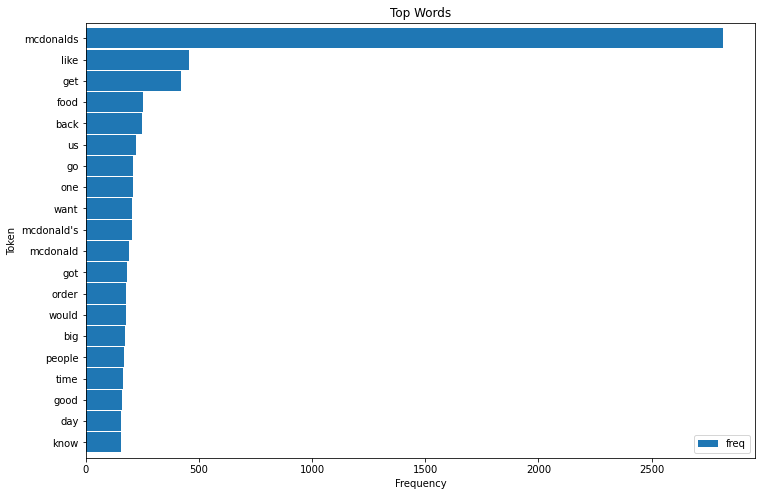

In [33]:
ax = df_freq.head(20).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words');

These are our top-20 (most frequent) words. We should think on excluding the words mcdonalds, mcdonald's and mcdonald by adding these words to our stop words.

We should also have in mind that we used a very simple query to extract our tweets for testing purposes.

#### 2.3. Compute IDF (inverse document frequency)

In [35]:
def compute_idf(df, column='tokens', process_text=None, min_df=1):

    # process text if process_text is not None and update counter
    def process_update(doc):
        tokens = doc if process_text is None else process_text(doc)
        counter.update(set(tokens)) # each token is counted only once per document

    # count tokens
    counter = Counter()
    df[column].map(process_update)

    # create data frame and compute idf
    df_idf = pd.DataFrame.from_dict(counter, orient='index', columns=['doc_freq'])
    df_idf = df_idf.query('doc_freq >= @min_df') # we are using 1 as default
    df_idf['idf'] = np.log(len(df)/df_idf['doc_freq']) + 0.1 # see "ideal" value for this additional factor
    df_idf.index.name = 'token'
    return df_idf

In [36]:
df_idf = compute_idf(df_en)

df_idf.head()

,doc_freq,idf
token,,
breakfast,72,4.413220
sandwich,39,5.026324
respect,7,6.743976
nigga,6,6.898126
chicken,118,3.919201


#### 2.4. Compute TF-IDF (term frequency - inverse document frequency)

In [37]:
df_freq = df_freq.join(df_idf)
df_freq['tfidf'] = df_freq['freq'] * df_freq['idf']

df_freq.head()

,freq,doc_freq,idf,tfidf
token,,,,
mcdonalds,2817,2744,0.772714,2176.735022
like,456,420,2.649631,1208.231811
get,422,390,2.723739,1149.417916
food,254,230,3.251807,825.958868
back,251,241,3.205089,804.477325


In [38]:
df_freq.sort_values('tfidf', ascending=False).head(20)

,freq,doc_freq,idf,tfidf
token,,,,
mcdonalds,2817,2744,0.772714,2176.735022
like,456,420,2.649631,1208.231811
get,422,390,2.723739,1149.417916
food,254,230,3.251807,825.958868
back,251,241,3.205089,804.477325
us,224,212,3.333300,746.659111
go,211,198,3.401619,717.741577
one,208,192,3.432391,713.937225
mcdonald's,204,183,3.480400,710.001544


#### 2.5. Compute n-gram frequency for n=2 (bigrams)

In [53]:
bow_vectorizer_ngrams = CountVectorizer(lowercase=True, 
                                        tokenizer=tokens_nopunct, 
                                        stop_words=stopwords, 
                                        ngram_range=(2, 2))

cv_bow_ngrams = bow_vectorizer_ngrams.fit_transform(df_en['text'])
df_cv_bow_ngrams = pd.DataFrame(cv_bow_ngrams.toarray(), columns=bow_vectorizer_ngrams.get_feature_names_out())

df_cv_bow_ngrams

,#1000xgem #cryptotwitter,#1000xgem #gems1000x,#12 eat,#180 📍,#20towards200 #hotyouz,#23794 might,#300m #admix,#34188 6/20,#666 im,#80s #90s,...,🧼 😊,🫖 👌,🫡 🫡,🫤 son,🫵 🏻,🫶 like,🫶 🏻,🫶 🏼,🫶 🏾,🫶 🫶
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_freq_ngrams = pd.DataFrame(df_cv_bow_ngrams.sum(axis = 0).index, columns=['token'])
df_freq_ngrams['freq'] = df_cv_bow_ngrams.sum(axis = 0).values

df_freq_ngrams.head()

,token,freq
0,#1000xgem #cryptotwitter,1
1,#1000xgem #gems1000x,1
2,#12 eat,1
3,#180 📍,2
4,#20towards200 #hotyouz,3


In [55]:
# sort df in descending order

df_freq_ngrams.set_index('token', inplace=True)
df_freq_ngrams.sort_values('freq', ascending=False, inplace=True)
df_freq_ngrams.head(10)

,freq
token,
bring back,91
big mac,78
ice cream,67
like mcdonalds,60
burger king,52
go mcdonalds,52
fast food,48
mcdonalds sprite,46
mcdonalds bitch,46


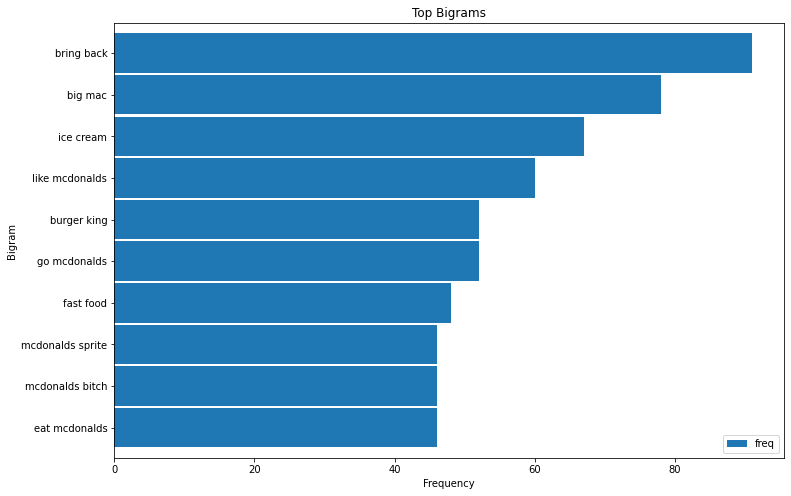

In [142]:
ax = df_freq_ngrams.head(10).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Bigram', title='Top Bigrams');

These are our top-10 (most frequent) bigrams.

We can now generalize this approach for any given n.

#### 2.6. Compute n-gram frequency

In [124]:
def compute_freq(df, tokenizer=tokens_nopunct, stop_words=stopwords, n_min=1, n_max=1, min_df=1):
    
    bow_vectorizer = CountVectorizer(lowercase=True, 
                                     tokenizer=tokenizer, 
                                     stop_words=stop_words, 
                                     ngram_range=(n_min, n_max), 
                                     min_df=min_df)
    
    cv_bow = bow_vectorizer.fit_transform(df['text'])
    df_cv_bow = pd.DataFrame(cv_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
    
    df_freq = pd.DataFrame(df_cv_bow.sum(axis = 0).index, columns=['token'])
    df_freq['freq'] = df_cv_bow.sum(axis = 0).values
    
    df_freq['n-gram size'] = df_freq['token'].map(lambda x: len(str.split(x))) # size of n-gram
    df_freq.drop(df_freq[df_freq['n-gram size'] > n_max].index, inplace=True) # removes rows with n-gram size greater than expected

    return df_freq

We will now calculate token frequency for unigrams, bigrams and trigrams.

In [125]:
df_freq = compute_freq(df_en, n_max=3)

In [126]:
df_freq['n-gram size'].value_counts()

3    41182
2    40141
1    12760
Name: n-gram size, dtype: int64

As expected, we have n-grams of 1, 2 and 3 tokens.

In [127]:
df_freq.sort_values('freq', ascending=False, inplace=True)
df_freq.head(100)['n-gram size'].value_counts()

1    98
2     2
Name: n-gram size, dtype: int64

For our top-100 n-grams, only 2 are bigrams and we have no trigrams.

We can calculate a weighted frequency to give more weight to n-grams with n > 1.

In [128]:
df_freq['weighted_freq'] = df_freq['freq'] * df_freq['n-gram size']
df_freq.sort_values('weighted_freq', ascending=False, inplace=True)

df_freq.head(100)['n-gram size'].value_counts()

1    80
2    17
3     3
Name: n-gram size, dtype: int64

For our top-100 n-grams, we now have 80 unigrams, 17 bigrams and 3 trigrams.

In [129]:
df_freq.head()

,token,freq,n-gram size,weighted_freq
51660,mcdonalds,2817,1,2817
46492,like,456,1,456
32620,get,422,1,422
30038,food,254,1,254
10171,back,251,1,251


In [130]:
df_freq.set_index('token', inplace=True)

### 3. Visualize keywords in wordclouds

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [46]:
def wordcloud(word_freq, title=None, max_words=100, additional_stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="viridis", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # remove additional stop words from frequency counter
    if additional_stopwords is not None:
        counter = {token: freq for (token, freq) in counter.items() 
                   if token not in additional_stopwords}
        
    wc.generate_from_frequencies(counter)
    
    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

#### 3.1. Wordclouds with term frequency and TF-IDF 

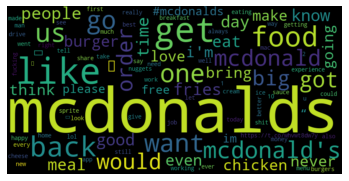

In [47]:
wordcloud(df_freq['freq'])

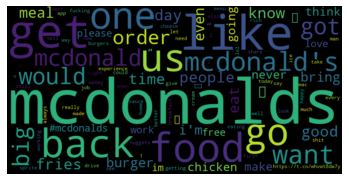

In [48]:
wordcloud(df_freq['tfidf'])

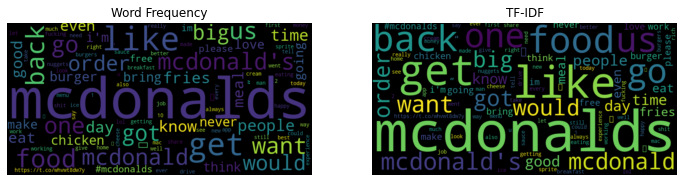

In [49]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
wordcloud(df_freq['freq'], title='Word Frequency')

plt.subplot(1,2,2)
wordcloud(df_freq['tfidf'], title='TF-IDF')

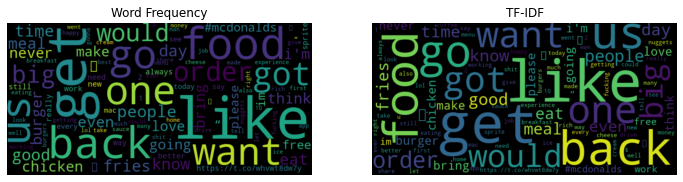

In [50]:
# removing additional stop words

add_stop = ["mcdonalds", "mcdonald's", "mcdonald"]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
wordcloud(df_freq['freq'], title='Word Frequency', additional_stopwords=add_stop)

plt.subplot(1,2,2)
wordcloud(df_freq['tfidf'], title='TF-IDF', additional_stopwords=add_stop)